<a href="https://colab.research.google.com/github/npuneeth/York_Univ_NLP/blob/main/Data_Preparation_and_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installation

In [ ]:
! pip install pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set_theme()
! pip install Kaggle
! mkdir ~/.kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#for word embedding
import gensim
from gensim.models import Word2Vec #Word2Vec is mostly used for huge datasets

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
!pip install -U pip setuptools wheel
!pip install spacy
!python -m spacy download en_core_web_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 5.8 MB/s 
     |████████████████████████████████| 1.2 MB 34.9 MB/s 
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2022-11-24 20:21:45.578793: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 57.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download -c nlp-getting-started --force
! unzip nlp-getting-started.zip

  0% 0.00/593k [00:00<?, ?B/s]
100% 593k/593k [00:00<00:00, 84.3MB/s]
Archive:  nlp-getting-started.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [ ]:
train_data=train_data.drop(['id', 'location'], axis=1)

In [ ]:
print(train_data.shape)
train_data.head()

(7613, 3)


,keyword,text,target
0,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,NaN,Forest fire near La Ronge Sask. Canada,1
2,NaN,All residents asked to 'shelter in place' are ...,1
3,NaN,"13,000 people receive #wildfires evacuation or...",1
4,NaN,Just got sent this photo from Ruby #Alaska as ...,1


## Experimental Data Analysis

0    4342
1    3271
Name: target, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


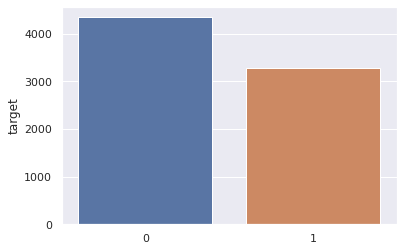

In [ ]:
# CLASS DISTRIBUTION
#if dataset is balanced or not
x=train_data['target'].value_counts()
print(x)
sns.barplot(x.index,x)

In [ ]:
#Missing values
train_data.isna().sum()

keyword    61
text        0
target      0
dtype: int64

In [ ]:
#1. WORD-COUNT
train_data['word_count'] = train_data['text'].apply(lambda x: len(str(x).split()))
print(train_data[train_data['target']==1]['word_count'].mean()) #Disaster tweets
print(train_data[train_data['target']==0]['word_count'].mean()) #Non-Disaster tweets
#Disaster tweets are more wordy than the non-disaster tweets

#2. CHARACTER-COUNT
train_data['char_count'] = train_data['text'].apply(lambda x: len(str(x)))
print(train_data[train_data['target']==1]['char_count'].mean()) #Disaster tweets
print(train_data[train_data['target']==0]['char_count'].mean()) #Non-Disaster tweets
#Disaster tweets are longer than the non-disaster tweets

#3. UNIQUE WORD-COUNT
train_data['unique_word_count'] = train_data['text'].apply(lambda x: len(set(str(x).split())))
print(train_data[train_data['target']==1]['unique_word_count'].mean()) #Disaster tweets
print(train_data[train_data['target']==0]['unique_word_count'].mean()) #Non-Disaster tweets

15.167532864567411
14.704744357438969
108.11342097217977
95.70681713496084
14.664934270865178
14.09649930907416


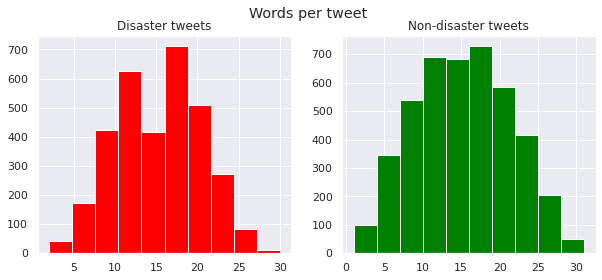

In [ ]:
#Plotting word-count per tweet
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
train_words=train_data[train_data['target']==1]['word_count']
ax1.hist(train_words,color='red')
ax1.set_title('Disaster tweets')
train_words=train_data[train_data['target']==0]['word_count']
ax2.hist(train_words,color='green')
ax2.set_title('Non-disaster tweets')
fig.suptitle('Words per tweet')
plt.show()

## Pre-processing

In [ ]:
train_data.head()

,keyword,text,target,word_count,char_count,unique_word_count
0,NaN,Our Deeds are the Reason of this #earthquake M...,1,13,69,13
1,NaN,Forest fire near La Ronge Sask. Canada,1,7,38,7
2,NaN,All residents asked to 'shelter in place' are ...,1,22,133,20
3,NaN,"13,000 people receive #wildfires evacuation or...",1,8,65,8
4,NaN,Just got sent this photo from Ruby #Alaska as ...,1,16,88,15


In [ ]:
import re
def clean(s):
    s = s.replace(r'#', " ")
    s = re.sub(r'htt.+? ', " ", s)
    s = re.sub(r'\(*https*://[^\)]*\)*', "", s)
    s = s.replace(r'=>', " ")
    s = s.replace(r'hah', " ")
    s = re.sub(r'ha+ah', " ", s)
    s = re.sub(r'!+', " ", s)
    s = re.sub(r'\?+', " ", s)
    s = re.sub(r'\.\.+', " ", s)
    s = s.replace(r':)', " ")
    s = s.replace(r':D', " ")
    s = s.replace(r':(', " ")
    s = s.replace(r';)', " ")
    s = s.replace(r':P', " ")
    s = s.replace(r'looo+l', " ")
    s = re.sub(r'LOO+OL', " ", s)
    s = re.sub(r'SOOO\w+', " ", s)
    s = re.sub(r'Coo+oL', " ", s)
    s = re.sub(r'loo+ol', " ", s)
    s = s.replace(r'lol', " ")
    s = s.replace(r'lool', " ")
    s = re.sub(r'coo+ol', " ", s)
    s = re.sub(r'coo+ol', " ", s)
    s = re.sub('Cooo+L', " ", s)
    s = re.sub('Cooo+ol', " ", s)
    s = s.replace(r'Â', " ")
    s = s.replace(r'Ã', " ")
    s = s.replace(r'%', " ")
    s = s.replace(r'›', " ")
    s = re.sub(r'sooo+', " ", s)
    s = s.replace(r'¥', " ")
    s = s.replace(r'&', " ")
    s = s.replace(r'   ', " ")
    s = s.replace(r'  ', " ")
#    s = s.replace(r'&amp', "") Does not work
    s = s.replace(r'/', " ")
    s = s.replace(r'FYI', " ")
    s = s.replace(r'‰', " ")
    s = re.sub(r'Û', " ", s)
    s = s.replace(r'Ò', " ")
    s = s.replace(r'Ó', " ")
    s = re.sub(r'@.+? ', " ",  s)
    s = re.sub(r'\b @\w+', " ",  s)
    s = s.replace(r'£', " ")
    s = s.replace(r'dd-mm-yyyy', " ")
    s = re.sub(r'\++', " ", s)
    s = re.sub(r':+', " ",s)
    s = s.replace(r';', " ")
    s = s.replace(r'(', " ")
    s = s.replace(r')', " ")
    s = re.sub(r'[0-9*]', " ", s)
    s = s.replace(r' PM ', " ")
    s = s.replace(r' AM ', " ")
    s = s.replace(r' - ', " ")
    s = s.replace(r'å', " ")
    s = s.replace(r'_', " ")
    s = s.replace(r'Ê', " ")
    s = s.replace(r'\|', " ")
    s = s.replace(r'|', " ")
    s = s.replace(r']', " ")    
    s = s.replace(r'[', " ")    
    s = s.replace(r'¢', " ")
    s = s.replace(r'ã', " ")
    s = s.replace(r'\$', " ")
    s = s.replace(r'$', " ")
    s = s.replace(r'Ï', " ")
    s = s.replace(r'ª', " ")
    s = s.replace(r'OMG', " ")
    s = s.replace(r'omg', " ")
    s = s.replace(r'LMAO', " ")
    s = s.replace(r'lmao', " ")
    s = s.replace(r'$', " ")
    s = s.replace(r'  ', " ")
    s = s.replace(r'%20', "")
    s = s.replace(r'[' + string.punctuation + ']'," ") #trying to remove all special characters
    s = s.replace(r'amp', "")
    return str(s)

In [ ]:
train_data["text_clean"] = ''

In [ ]:
test_data["text_clean"] = ""

In [ ]:
for i, row in train_data.iterrows():
    train_data.at[i, "text_clean"] = clean(row.text)

In [ ]:
for i, row in test_data.iterrows():
    test_data.at[i, "text_clean"] = clean(row.text)

In [ ]:
train_data=train_data.drop(['selftext_clean'], axis=1)

In [ ]:
train_data

,keyword,text,target,text_clean
0,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this earthquake Ma...
1,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask. Canada
2,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to 'shelter in place' are ...
3,NaN,"13,000 people receive #wildfires evacuation or...",1,", people receive wildfires evacuation orders..."
4,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby Alaska as s...
...,...,...,...,...
7608,NaN,Two giant cranes holding a bridge collapse int...,1,Two giant cranes holding a bridge collapse int...
7609,NaN,@aria_ahrary @TheTawniest The out of control w...,1,The out of control wild fires in California e...
7610,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,M . UTC km S of Volcano Hawaii.
7611,NaN,Police investigating after an e-bike collided ...,1,Police investigating after an e-bike collided ...


In [ ]:
test_data

,id,keyword,location,text,text_clean
0,0,NaN,NaN,Just happened a terrible car crash,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...","Heard about earthquake is different cities, st..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...","there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,Apocalypse lighting. Spokane wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,Typhoon Soudelor kills in China and Taiwan
...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,EARTHQUAKE SAFETY LOS ANGELES  SAFETY FASTEN...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,Green Line derailment in Chicago
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,MEG issues Hazardous Weather Outlook HWO


## NLP

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
for i, row in train_data.iterrows():
    if i % 1000 == 0:
        print(i)
    if(row["text_clean"] and len(str(row["text_clean"])) < 10000):
        doc = nlp(str(row["text_clean"]))
        adjectives = []
        nouns = []
        verbs = []
        lemmas = []

        for token in doc:
            lemmas.append(token.lemma_)
            if token.pos_ == "ADJ":
                adjectives.append(token.lemma_)
            if token.pos_ == "NOUN" or token.pos_ == "PROPN":
                nouns.append(token.lemma_)
            if token.pos_ == "VERB":
                verbs.append(token.lemma_)
                
        train_data.at[i, "text_lemma"] = " ".join(lemmas)                
        train_data.at[i, "text_nouns"] = " ".join(nouns)
        train_data.at[i, "text_adjectives"] = " ".join(adjectives)
        train_data.at[i, "text_verbs"] = " ".join(verbs)
        train_data.at[i, "text_nav"] = " ".join(nouns+adjectives+verbs)
        train_data.at[i, "no_tokens"] = len(lemmas)

0
1000
2000
3000
4000
5000
6000
7000


In [ ]:
for i, row in test_data.iterrows():
    if i % 1000 == 0:
        print(i)
    if(row["text_clean"] and len(str(row["text_clean"])) < 10000):
        doc = nlp(str(row["text_clean"]))
        adjectives = []
        nouns = []
        verbs = []
        lemmas = []

        for token in doc:
            lemmas.append(token.lemma_)
            if token.pos_ == "ADJ":
                adjectives.append(token.lemma_)
            if token.pos_ == "NOUN" or token.pos_ == "PROPN":
                nouns.append(token.lemma_)
            if token.pos_ == "VERB":
                verbs.append(token.lemma_)
                
        test_data.at[i, "text_lemma"] = " ".join(lemmas)                
        test_data.at[i, "text_nouns"] = " ".join(nouns)
        test_data.at[i, "text_adjectives"] = " ".join(adjectives)
        test_data.at[i, "text_verbs"] = " ".join(verbs)
        test_data.at[i, "text_nav"] = " ".join(nouns+adjectives+verbs)
        test_data.at[i, "no_tokens"] = len(lemmas)

0
1000
2000
3000


In [ ]:
train_data.head()

,keyword,text,target,text_clean,text_lemma,text_nouns,text_adjectives,text_verbs,text_nav,no_tokens
0,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this earthquake Ma...,our deed be the reason of this earthquake may ...,deed reason earthquake ALLAH,,forgive,deed reason earthquake ALLAH forgive,13.0
1,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask. Canada,forest fire near La Ronge Sask . Canada,forest fire La Ronge Sask Canada,,,forest fire La Ronge Sask Canada,8.0
2,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to 'shelter in place' are ...,all resident ask to ' shelter in place ' be be...,resident shelter place officer evacuation shel...,other,ask notify expect,resident shelter place officer evacuation shel...,25.0
3,NaN,"13,000 people receive #wildfires evacuation or...",1,", people receive wildfires evacuation orders...",", people receive wildfire evacuation order...",people evacuation order California,,receive wildfire,people evacuation order California receive wil...,10.0
4,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby Alaska as s...,just got send this photo from Ruby Alaska as s...,photo Ruby Alaska smoke wildfire pour school,,send,photo Ruby Alaska smoke wildfire pour school send,16.0


In [ ]:
test_data.head()

,id,keyword,location,text,text_clean,text_lemma,text_nouns,text_adjectives,text_verbs,text_nav,no_tokens
0,0,NaN,NaN,Just happened a terrible car crash,Just happened a terrible car crash,just happen a terrible car crash,car crash,terrible,happen,car crash terrible happen,6.0
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...","Heard about earthquake is different cities, st...","hear about earthquake be different city , stay...",earthquake city,different safe,hear stay,earthquake city different safe hear stay,11.0
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...","there is a forest fire at spot pond, geese are...","there be a forest fire at spot pond , geese be...",forest fire spot pond geese street,,be flee save,forest fire spot pond geese street be flee save,22.0
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,Apocalypse lighting. Spokane wildfires,apocalypse lighting . Spokane wildfire,apocalypse lighting Spokane,,wildfire,apocalypse lighting Spokane wildfire,5.0
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,Typhoon Soudelor kills in China and Taiwan,Typhoon Soudelor kill in China and Taiwan,Typhoon Soudelor China Taiwan,,kill,Typhoon Soudelor China Taiwan kill,8.0


In [ ]:
train_data["text"][0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [ ]:
train_data["text_nav"][0]

'deed reason earthquake ALLAH forgive'

In [ ]:
from google.colab import files
train_data.to_csv('train_data_processed.csv') 
files.download('train_data_processed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
test_data=test_data.drop(['id', 'location'], axis=1)

In [ ]:
test_data


,keyword,text,text_clean,text_lemma,text_nouns,text_adjectives,text_verbs,text_nav,no_tokens
0,NaN,Just happened a terrible car crash,Just happened a terrible car crash,just happen a terrible car crash,car crash,terrible,happen,car crash terrible happen,6.0
1,NaN,"Heard about #earthquake is different cities, s...","Heard about earthquake is different cities, st...","hear about earthquake be different city , stay...",earthquake city,different safe,hear stay,earthquake city different safe hear stay,11.0
2,NaN,"there is a forest fire at spot pond, geese are...","there is a forest fire at spot pond, geese are...","there be a forest fire at spot pond , geese be...",forest fire spot pond geese street,,be flee save,forest fire spot pond geese street be flee save,22.0
3,NaN,Apocalypse lighting. #Spokane #wildfires,Apocalypse lighting. Spokane wildfires,apocalypse lighting . Spokane wildfire,apocalypse lighting Spokane,,wildfire,apocalypse lighting Spokane wildfire,5.0
4,NaN,Typhoon Soudelor kills 28 in China and Taiwan,Typhoon Soudelor kills in China and Taiwan,Typhoon Soudelor kill in China and Taiwan,Typhoon Soudelor China Taiwan,,kill,Typhoon Soudelor China Taiwan kill,8.0
...,...,...,...,...,...,...,...,...,...
3258,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,EARTHQUAKE SAFETY LOS ANGELES  SAFETY FASTEN...,earthquake SAFETY LOS ANGELES  SAFETY faste...,earthquake LOS ANGELES  SAFETY XrWn,,SAFETY fastener,earthquake LOS ANGELES  SAFETY XrWn SAFETY fa...,9.0
3259,NaN,Storm in RI worse than last hurricane. My city...,Storm in RI worse than last hurricane. My city...,storm in RI bad than last hurricane . my city ...,storm RI hurricane city other yard k power,bad last,hit look bomb,storm RI hurricane city other yard k power bad...,29.0
3260,NaN,Green Line derailment in Chicago http://t.co/U...,Green Line derailment in Chicago,Green Line derailment in Chicago,Green Line derailment Chicago,,,Green Line derailment Chicago,5.0
3261,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,MEG issues Hazardous Weather Outlook HWO,MEG issue Hazardous Weather Outlook HWO,MEG issue Hazardous Weather Outlook HWO,,,MEG issue Hazardous Weather Outlook HWO,6.0


In [ ]:
from google.colab import files
test_data.to_csv('test_data_processed.csv') 
files.download('test_data_processed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## EDA

In [ ]:
# filter warnings on depreciation etc.
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# import pandas, numpy
import pandas as pd
import numpy as np

# adjust pandas display
pd.options.display.max_columns = 30
pd.options.display.max_rows = 100
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.precision = 2
pd.options.display.max_colwidth = -1

In [ ]:
# Import matplotlib and seaborn and adjust some defaults
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 100

import seaborn as sns
sns.set_style("whitegrid")

In [ ]:
# list column names and datatypes
train_data.dtypes

keyword                object 
text                   object 
target                 int64  
word_count             int64  
char_count             int64  
unique_word_count      int64  
selftext_clean         object 
selftext_lemma         object 
selftext_nouns         object 
selftext_adjectives    object 
selftext_verbs         object 
selftext_nav           object 
no_tokens              float64
dtype: object

In [ ]:
# size info, including memory consumption
train_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   keyword              7552 non-null   object 
 1   text                 7613 non-null   object 
 2   target               7613 non-null   int64  
 3   word_count           7613 non-null   int64  
 4   char_count           7613 non-null   int64  
 5   unique_word_count    7613 non-null   int64  
 6   selftext_clean       7613 non-null   object 
 7   selftext_lemma       7610 non-null   object 
 8   selftext_nouns       7610 non-null   object 
 9   selftext_adjectives  7610 non-null   object 
 10  selftext_verbs       7610 non-null   object 
 11  selftext_nav         7610 non-null   object 
 12  no_tokens            7610 non-null   float64
dtypes: float64(1), int64(4), object(8)
memory usage: 6.4 MB


In [ ]:
columns = [col for col in train_data.columns if not col.startswith('self')]
columns

['keyword',
 'text',
 'target',
 'word_count',
 'char_count',
 'unique_word_count',
 'no_tokens']

In [ ]:
# describe categorical columns of type np.object 
train_data[['keyword', 'text']] \
  .describe(include=np.object) \
  .transpose()

,count,unique,top,freq
keyword,7552,221,fatalities,45
text,7613,7503,11-Year-Old Boy Charged With Manslaughter of Toddler: Report: An 11-year-old boy has been charged with manslaughter over the fatal sh...,10


In [ ]:
train_data['text'].value_counts()[:10]

11-Year-Old Boy Charged With Manslaughter of Toddler: Report: An 11-year-old boy has been charged with manslaughter over the fatal sh...        10
He came to a land which was engulfed in tribal war and turned it into a land of peace i.e. Madinah. #ProphetMuhammad #islam                     6 
The Prophet (peace be upon him) said 'Save yourself from Hellfire even if it is by giving half a date in charity.'                              6 
#Bestnaijamade: 16yr old PKK suicide bomber who detonated bomb in ... http://t.co/KSAwlYuX02 bestnaijamade bestnaijamade bestnaijamade beÛ_    6 
Madhya Pradesh Train Derailment: Village Youth Saved Many Lives                                                                                 5 
that horrible sinking feeling when youÛªve been at home on your phone for a while and you realise its been on 3G this whole time               4 
To fight bioterrorism sir.                                                                                            

In [ ]:
# describe numerical columns
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
target,7613.00,0.43,0.50,0.00,0.00,0.00,1.00,1.00
word_count,7613.00,14.90,5.73,1.00,11.00,15.00,19.00,31.00
char_count,7613.00,101.04,33.78,7.00,78.00,107.00,133.00,157.00
unique_word_count,7613.00,14.34,5.28,1.00,11.00,14.00,18.00,29.00
no_tokens,7610.00,15.26,6.60,1.00,10.00,15.00,20.00,41.00


In [ ]:
# number of unique values = count distinct
train_data['keyword'].nunique()

221

In [ ]:
# number of unique values = count distinct
train_data['text'].nunique()

7503

## Exploring Text Categories

In [ ]:
# group by location, count distinct keyword and tweets
cat_train = train_data.groupby('keyword') \
           .agg({'keyword': pd.Series.nunique,
                 'text': pd.Series.count}) \
           .rename(columns={'keyword': 'num_keyword',
                            'text': 'num_tweets'}) \
           .sort_values('num_keyword', ascending=False)
            
# show top 5 records
cat_train.head(5)

,num_keyword,num_tweets
keyword,,
ablaze,1,36
oil%20spill,1,38
massacre,1,36
mayhem,1,30
meltdown,1,33


In [ ]:
cat_train.describe()

,num_keyword,num_tweets
count,221.00,221.00
mean,1.00,34.17
std,0.00,4.79
min,1.00,9.00
25%,1.00,33.00
50%,1.00,35.00
75%,1.00,37.00
max,1.00,45.00


### Visualizing Frequency Distributions

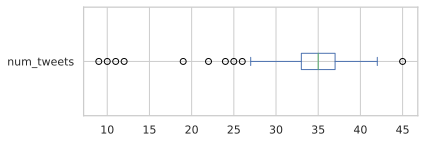

In [ ]:
# horizontal boxplot of a dataframe column
cat_train[['num_tweets']].plot(kind='box', vert=False, figsize=(6, 2));

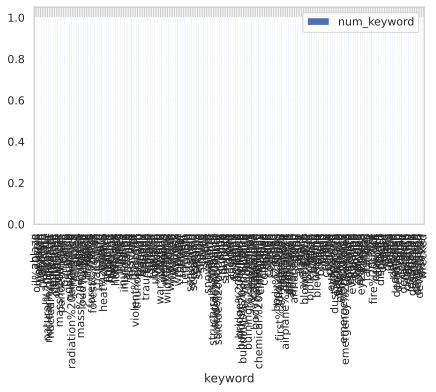

In [ ]:
# bar chart of a dataframe column
cat_train[['num_keyword']].plot(kind='bar', figsize=(7,4));

## Exploring Word Frequencies

In [ ]:
# create a data frame slice
sub_train = train_data[train_data['keyword']=='disaster']

# sample cleaned text and tokens tagged as nouns
sub_train[['selftext_clean', 'selftext_nouns']].sample(2)

NameError: ignored

### Creating a List of Tokens from a List of Documents

In [ ]:
def my_tokenizer(text):
    return text.split() if text != None else []

In [ ]:
# transform list of documents into a single list of tokens
tokens = sub_train.selftext_nouns.map(my_tokenizer).sum()

In [ ]:
print(tokens[:200])

### Counting Frequencies with a Counter

In [ ]:
from collections import Counter

counter = Counter(tokens)
counter.most_common(20)

In [ ]:
train_data.keyword.unique()

In [ ]:
print([t[0] for t in counter.most_common(200)])   

In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS

def remove_stopwords(tokens):
    """Remove stopwords from a list of tokens."""
    return [t for t in tokens if t not in STOP_WORDS]

# rebuild counter
counter = Counter(remove_stopwords(tokens))

In [ ]:
# convert list of tuples into data frame
freq_train = pd.DataFrame.from_records(counter.most_common(20),
                                    columns=['token', 'count'])

# create bar plot
freq_train.plot(kind='bar', x='token');

### Using Word Clouds

In [ ]:
from wordcloud import WordCloud

def wordcloud(counter):
    """A small wordloud wrapper"""
    wc = WordCloud(width=1200, height=800, 
                   background_color="white", 
                   max_words=200) 
    wc.generate_from_frequencies(counter)

    # Plot
    fig=plt.figure(figsize=(6, 4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

In [ ]:
# create wordcloud
wordcloud(counter)